## Model 5: Let's replicate VGG16
This model tries to replicate the VGG16 architecture as closely as possible, while still building the CNN from scratch. It will serve as a comparison with VGG16 transfer learning models.


## Load modules

In [13]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import Adam

import helpers

## Load dataset

In [14]:
# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test = helpers.load_dataset()

# augmentate data
datagen = helpers.data_augmentation(x_train)

Loading CIFAR10 dataset


## Model architecture

In [15]:
# let's replicate the internal structure of VGG16
# I added BatchNormalization, as it had not been invented yet when VGG16 was created

input_shape = x_train.shape[1:]

model = Sequential()

model.add(Input(shape=input_shape))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='vgg16'))

model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [16]:
# compile model
adam_opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

# implement callbacks
lr_schedule = LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# train model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64), 
    epochs=100, 
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, lr_schedule]
)



Epoch 1/100
782/782 [==============================] - 24s 21ms/step - loss: 1.9913 - accuracy: 0.2652 - val_loss: 1.4961 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 16s 20ms/step - loss: 1.5438 - accuracy: 0.4281 - val_loss: 1.3285 - val_accuracy: 0.5108 - lr: 8.9125e-04
Epoch 3/100
782/782 [==============================] - 15s 20ms/step - loss: 1.3344 - accuracy: 0.5331 - val_loss: 1.2172 - val_accuracy: 0.5845 - lr: 7.9433e-04
Epoch 4/100
782/782 [==============================] - 15s 20ms/step - loss: 1.1691 - accuracy: 0.6084 - val_loss: 1.2712 - val_accuracy: 0.5946 - lr: 7.0795e-04
Epoch 5/100
782/782 [==============================] - 15s 20ms/step - loss: 1.0359 - accuracy: 0.6651 - val_loss: 0.9732 - val_accuracy: 0.6946 - lr: 6.3096e-04
Epoch 6/100
782/782 [==============================] - 15s 20ms/step - loss: 0.9294 - accuracy: 0.7109 - val_loss: 0.8052 - val_accuracy: 0.7368 - lr: 5.6234e-04
Epoch 7/100
782/782 [===========

313/313 [==============================] - 1s 3ms/step - loss: 0.4008 - accuracy: 0.8957
Model Loss: 0.4008316993713379
Model Accuracy: 0.8956999778747559


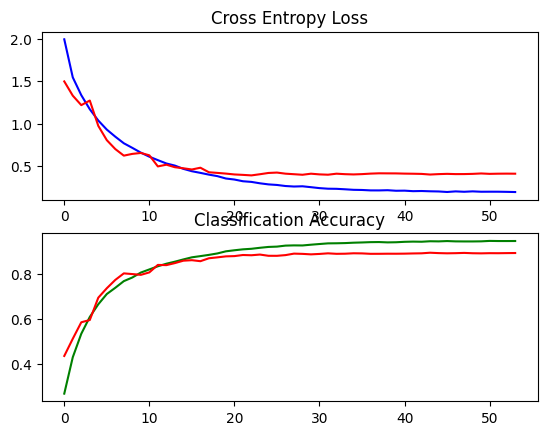

313/313 [==============================] - 1s 2ms/step


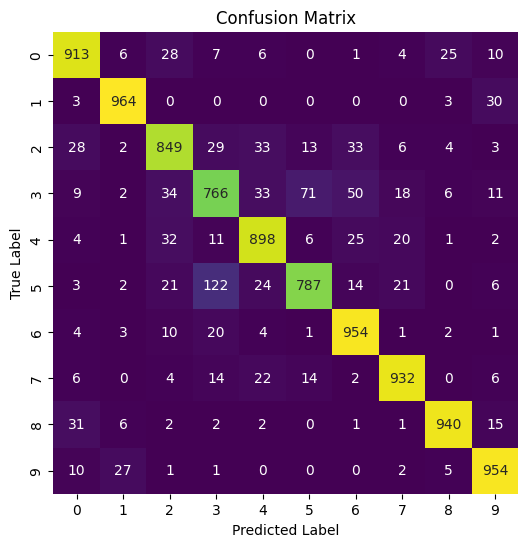

In [17]:
# plot results
helpers.evaluate_model(model, x_test, y_test)
helpers.plot_model_history(history)
helpers.plot_confusion_matrix(model, x_test, y_test)

## Conclusion
I was surprised by the results of training the VGG16 replica. I used similar parameters than for model 4. I just added more convolutional blocks and trained for longer. Eventually, the EarlyStopping callback stopped the model after 54 epochs.  

The model reaches a test accuracy of 89%, with very similar curves and confusion matrix as the previous model (which was a simplified version of VGG16 made from scratch). This is a good example that more layers does not necessarely means better model. By making our model more complex and without a careful tuning of the hyperparameters, the gradient descent process is not working as good as before and it is more difficult for the model to adjust weights and biases.